(The data can be downloaded here: https://drive.google.com/file/d/1GM7YQ1oPwr2NrjFxqB9KR4cscSmX779x/view?usp=share_link)
      
## Importing Python Libraries

In [1]:
%matplotlib inline
import matplotlib.pylab as plt

import cv2
import PIL.Image as Image

import numpy as  np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical # Function to convert labels to one-hot encoding
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Dense, Activation,Input 


##  Load dogs dataset

In [2]:
data_dir = 'D:\\ChromeDownloads\\Data\\dogs'
print(data_dir)

import pathlib
data_dir = pathlib.Path(data_dir)
data_dir
print(type(data_dir))

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

D:\ChromeDownloads\Data\dogs
<class 'pathlib.WindowsPath'>
577


In [3]:
# Create the dictionary for the dog images
# Include your solution below

dogs_images_dict = {
    'beagle': list(data_dir.glob('beagle/*')),
    'bedlington_terrier': list(data_dir.glob('bedlington_terrier/*')),
    'pug': list(data_dir.glob('pug/*')),
}

In [4]:
dogs_labels_dict = {
    'beagle': 0,
    'bedlington_terrier': 1,
    'pug': 2,
}

In [5]:
X, y = [], []

for dog_name, images in dogs_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(dogs_labels_dict[dog_name])

In [6]:
X = np.array(X)
y = np.array(y)

## Train test split

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, random_state=1)

# Representing Labels using one-hot-encoding

In [9]:
k = np.unique(y).size

Y_oh_train = to_categorical(y_train, k) 
Y_oh_val = to_categorical(y_val, k) 
Y_oh_test = to_categorical(y_test, k)
# Displaying the 5 first elemnts
print('Y_train[:5]:')
print(y_train[:5])
print('\nY_oh_train[:5]=')
print(Y_oh_train[:5])

Y_train[:5]:
[1 0 0 0 1]

Y_oh_train[:5]=
[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


## Preprocessing: scale images

In [11]:
X_train_scaled = X_train / 255
X_val_scaled = X_val /255
X_test_scaled = X_test / 255

## Task 1: develop a Fully Connected Neural Network and train & test the dogs data

In [79]:
# you must create a fully connected neural network model with 5 layers: 
# 1 input layer, 4 hidden layers(more than 20 neurons for each layer), 1 output layer 

def my_FullyConnectedModel(my_shape=(224,224,3), k=3, lr=0.15):
    #include your solution below
    
    inputs = Input(shape=my_shape)
    hidden1 = Dense(30, activation='relu')(inputs)
    hidden2 = Dense(20, activation='relu')(hidden1)
    hidden3 = Dense(20, activation='relu')(hidden2)
    hidden4 = Dense(20, activation='relu')(hidden3)
    flat = tf.keras.layers.Flatten()(hidden4)
    out1 = Dense(k, activation='softmax')(flat)
    model = Model(inputs=inputs, outputs=out1)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
    
    return model  


In [80]:
model = my_FullyConnectedModel()
print(model.summary())

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 dense_58 (Dense)            (None, 224, 224, 30)      120       
                                                                 
 dense_59 (Dense)            (None, 224, 224, 20)      620       
                                                                 
 dense_60 (Dense)            (None, 224, 224, 20)      420       
                                                                 
 dense_61 (Dense)            (None, 224, 224, 10)      210       
                                                                 
 flatten_5 (Flatten)         (None, 501760)            0         
                                                                 
 dense_62 (Dense)            (None, 3)                 150

In [81]:
# Include your solution below

my_batch_size = 50
my_epochs = 20

history = model.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val), \
                    batch_size=my_batch_size, epochs=my_epochs,verbose=1)

Epoch 1/20
7/7 [==============================] - 8s 1s/step - loss: 2177.0664 - accuracy: 0.3536 - val_loss: 1.0993 - val_accuracy: 0.3707
Epoch 2/20
7/7 [==============================] - 7s 1000ms/step - loss: 1.1121 - accuracy: 0.3333 - val_loss: 1.0967 - val_accuracy: 0.3707
Epoch 3/20
7/7 [==============================] - 7s 1s/step - loss: 1.1037 - accuracy: 0.2957 - val_loss: 1.1010 - val_accuracy: 0.3190
Epoch 4/20
7/7 [==============================] - 7s 1s/step - loss: 1.0974 - accuracy: 0.3565 - val_loss: 1.1055 - val_accuracy: 0.3190
Epoch 5/20
7/7 [==============================] - 7s 992ms/step - loss: 1.0987 - accuracy: 0.3565 - val_loss: 1.1023 - val_accuracy: 0.3190
Epoch 6/20
7/7 [==============================] - 7s 1s/step - loss: 1.0985 - accuracy: 0.3565 - val_loss: 1.1010 - val_accuracy: 0.3190
Epoch 7/20
7/7 [==============================] - 7s 992ms/step - loss: 1.0998 - accuracy: 0.3101 - val_loss: 1.0963 - val_accuracy: 0.3707
Epoch 8/20
7/7 [============

In [82]:
test_accuracy = model.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy)

4/4 [==============================] - 1s 234ms/step - loss: 1.0993 - accuracy: 0.3621
[1.0992512702941895, 0.36206895112991333]


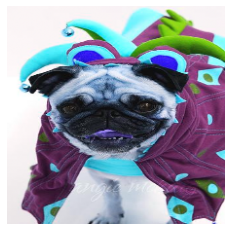

In [83]:
# choose an image from the testing dataset for testing, for example X_test_scaled[10] 
# you can try other images if you want by changing the index of X_test_scaled
import matplotlib.pylab as plt

testing_image = X_test_scaled[10]
plt.axis('off')
plt.imshow(testing_image)

testing_image = testing_image[np.newaxis, ...]

In [84]:
pred = model.predict(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label =labels[np.argmax(pred)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 0s 141ms/step
The predicted label for this image is:  pug


## Task 2: develop a Convolutional Neural Network and train & test the dogs data

In [61]:
# you must create a convolutional neural network model with 8 layers (1 input layer, 3 convolutional layers, 
# 2 dropout layers, 1 max pooling layer, 1 output layer)

def my_CNN_Model(my_shape = (224,224,3),k = 3, lr = 1e-4):
    # Include your solution below
    model_input = tf.keras.layers.Input(shape = my_shape)
    l1 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(model_input)
    l2 = tf.keras.layers.Conv2D(48, (3,3), padding='same', activation='relu')(l1)
    l2_drop = tf.keras.layers.Dropout(0.25)(l2)
    l3 = tf.keras.layers.MaxPool2D((2,2))(l2_drop)
    l4 = tf.keras.layers.Conv2D(96, (3,3), padding='same', activation='relu')(l3)
    l4_drop = tf.keras.layers.Dropout(0.25)(l4)
    flat = tf.keras.layers.Flatten()(l4_drop)
    out = tf.keras.layers.Dense(k,activation = 'softmax')(flat)
    model = tf.keras.models.Model(inputs = model_input, outputs = out)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss=tf.keras.losses.CategoricalCrossentropy(), metrics = ["accuracy"])
    return model


In [62]:
model2 = my_CNN_Model()
print(model2.summary())

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_6 (Conv2D)           (None, 224, 224, 48)      1344      
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 48)      20784     
                                                                 
 dropout_4 (Dropout)         (None, 224, 224, 48)      0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 112, 112, 48)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 96)      41568     
                                                          

In [71]:
my_batch_size = 50
my_epochs = 10

history2 = model2.fit(X_train_scaled, Y_oh_train, validation_data=(X_val_scaled,Y_oh_val), \
                    batch_size=my_batch_size, epochs=my_epochs,verbose=1)

Epoch 1/10
7/7 [==============================] - 47s 7s/step - loss: 0.9901 - accuracy: 0.4812 - val_loss: 1.0341 - val_accuracy: 0.4397
Epoch 2/10
7/7 [==============================] - 48s 7s/step - loss: 0.8480 - accuracy: 0.6551 - val_loss: 1.0310 - val_accuracy: 0.4914
Epoch 3/10
7/7 [==============================] - 46s 7s/step - loss: 0.7399 - accuracy: 0.6957 - val_loss: 1.0145 - val_accuracy: 0.5172
Epoch 4/10
7/7 [==============================] - 46s 7s/step - loss: 0.6307 - accuracy: 0.7652 - val_loss: 1.0382 - val_accuracy: 0.4483
Epoch 5/10
7/7 [==============================] - 46s 7s/step - loss: 0.5298 - accuracy: 0.7768 - val_loss: 1.0639 - val_accuracy: 0.5690
Epoch 6/10
7/7 [==============================] - 46s 7s/step - loss: 0.4372 - accuracy: 0.8580 - val_loss: 1.0683 - val_accuracy: 0.5172
Epoch 7/10
7/7 [==============================] - 46s 7s/step - loss: 0.3346 - accuracy: 0.9159 - val_loss: 1.0683 - val_accuracy: 0.5603
Epoch 8/10
7/7 [==================

In [74]:
test_accuracy2 = model2.evaluate(X_test_scaled,Y_oh_test)
print(test_accuracy2)

4/4 [==============================] - 2s 521ms/step - loss: 0.8747 - accuracy: 0.6466
[0.8747332096099854, 0.6465517282485962]


In [75]:
pred2 = model2.predict(testing_image)

labels = list(dogs_labels_dict.keys())

predicted_label =labels[np.argmax(pred2)]
print("The predicted label for this image is: ", predicted_label)

1/1 [==============================] - 0s 41ms/step
The predicted label for this image is:  pug


Epoch 1/1000, A: 0.5055936574935913, B: -1.427194356918335, C: 1.559637427330017, Cost: 4.415821075439453
Epoch 2/1000, A: 0.36519643664360046, B: -1.38182532787323, C: 1.5181978940963745, Cost: 1.9175909757614136
Epoch 3/1000, A: 0.2661117911338806, B: -1.3580824136734009, C: 1.4966108798980713, Cost: 1.4255437850952148
Epoch 4/1000, A: 0.2089599072933197, B: -1.347628116607666, C: 1.4871283769607544, Cost: 1.2064368724822998
Epoch 5/1000, A: 0.13938823342323303, B: -1.3380612134933472, C: 1.478462815284729, Cost: 1.115841031074524
Epoch 6/1000, A: 0.06431007385253906, B: -1.3311402797698975, C: 1.4722005128860474, Cost: 1.043077826499939
Epoch 7/1000, A: 0.09889689087867737, B: -1.3320591449737549, C: 1.4730312824249268, Cost: 1.0124602317810059
Epoch 8/1000, A: 0.09779128432273865, B: -1.3318108320236206, C: 1.472806453704834, Cost: 1.0181033611297607
Epoch 9/1000, A: 0.11143124103546143, B: -1.3323643207550049, C: 1.473306655883789, Cost: 1.0189684629440308
Epoch 10/1000, A: 0.0871

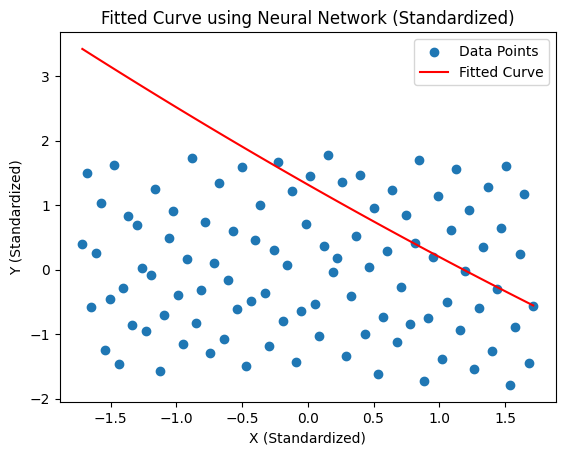

In [53]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data from file
x = []
y = []

with open('Part1_x_y_Values.txt', 'r') as file:
    data = file.readlines()[1:]

for point in data:
    xVal, yVal = point.strip()[1:-1].split(',')
    x.append(float(xVal))
    y.append(float(yVal))

x = np.array(x)
y = np.array(y)

# Standardize X and Y using StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_standardized = scaler_x.fit_transform(x.reshape(-1, 1))
y_standardized = scaler_y.fit_transform(y.reshape(-1, 1))

# Data
points_standardized = np.hstack((x_standardized, y_standardized))

# Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], use_bias=False),  # a*x^2
    tf.keras.layers.Dense(units=1, activation='linear', use_bias=False),  # b*x
    tf.keras.layers.Dense(units=1, activation='linear')  # c
])

# Compile the model with Mean Squared Error loss
model.compile(optimizer=tf.optimizers.SGD(0.01), loss='mse')

# Train the model with printing weights after each epoch
num_epochs = 1000
for epoch in range(num_epochs):
    history = model.fit(points_standardized[:, 0], points_standardized[:, 1], epochs=1, verbose=0)
    weights = model.get_weights()
    a, b, c = weights[0][0, 0], weights[1][0, 0], weights[2][0, 0]
    print(f"Epoch {epoch+1}/{num_epochs}, A: {a}, B: {b}, C: {c}, Cost: {history.history['loss'][0]}")

# Evaluate the model on the standardized data
cost_value = model.evaluate(points_standardized[:, 0], points_standardized[:, 1], verbose=0)
print("Final weights - A:", a, "  B:", b, "  C:", c, "  Final cost:", cost_value)

# Plot the standardized data and fitted curve
plt.scatter(points_standardized[:, 0], points_standardized[:, 1], label='Data Points')
x_range = np.linspace(min(points_standardized[:, 0]), max(points_standardized[:, 0]), 100)
y_pred_standardized = a * x_range ** 2 + b * x_range + c
plt.plot(x_range, y_pred_standardized, color='red', label='Fitted Curve')

plt.xlabel('X (Standardized)')
plt.ylabel('Y (Standardized)')
plt.title('Fitted Curve using Neural Network (Standardized)')
plt.legend()
plt.show()

Epoch 1/1000
4/4 [==============================] - 0s 1ms/step - loss: 2.1742
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.5474
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.3523
Epoch 4/1000
4/4 [==============================] - 0s 997us/step - loss: 1.2132
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1777
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1348
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 1.1052
Epoch 8/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0687
Epoch 9/1000
4/4 [==============================] - 0s 689us/step - loss: 1.0459
Epoch 10/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0354
Epoch 11/1000
4/4 [==============================] - 0s 997us/step - loss: 1.0201
Epoch 12/1000
4/4 [==============================] - 0s 1ms/step - loss: 1.0121
Epoch 13/1000
4/4 [========================

ValueError: x and y must have same first dimension, but have shapes (35,) and (1, 35)

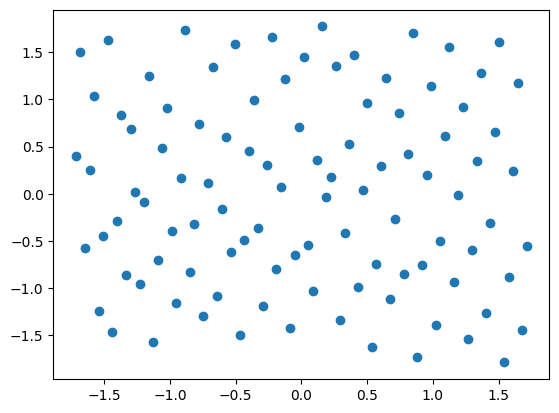

In [46]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data from file
x = []
y = []

with open('Part1_x_y_Values.txt', 'r') as file:
    data = file.readlines()[1:]

for point in data:
    xVal, yVal = point.strip()[1:-1].split(',')
    x.append(float(xVal))
    y.append(float(yVal))

x = np.array(x)
y = np.array(y)

# Standardize X and Y using StandardScaler
scaler_x = StandardScaler()
scaler_y = StandardScaler()

x_standardized = scaler_x.fit_transform(x.reshape(-1, 1))
y_standardized = scaler_y.fit_transform(y.reshape(-1, 1))

# Data
points_standardized = np.hstack((x_standardized, y_standardized))

# Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[1], use_bias=False),  # a*x^2
    tf.keras.layers.Dense(units=1, use_bias=False),  # b*x
    tf.keras.layers.Dense(units=1)  # c
])

# Compile the model with Mean Squared Error loss
model.compile(optimizer=tf.optimizers.SGD(0.01), loss='mse')

# Train the model
num_epochs = 1000
model.fit(points_standardized[:, 0], points_standardized[:, 1], epochs=num_epochs, verbose=1)

# Get the trained coefficients
a, b, c = model.layers[0].get_weights()[0][0, 0], model.layers[1].get_weights()[0][0, 0], model.layers[2].get_weights()[0]

# Evaluate the model on the standardized data
cost_value = model.evaluate(points_standardized[:, 0], points_standardized[:, 1], verbose=0)

print("A:", a, "  B:", b, "  C:", c, "  cost:", cost_value)

# Plot the standardized data and fitted curve
plt.scatter(points_standardized[:, 0], points_standardized[:, 1], label='Data Points')

x_range = np.arange(np.min(points_standardized[:, 0]), np.max(points_standardized[:, 0]), 0.1)
y_pred_standardized_curve = a * x_range ** 2 + b * x_range + c

plt.plot(x_range, y_pred_standardized_curve, color='red', label='Fitted Curve')

plt.xlabel('X (Standardized)')
plt.ylabel('Y (Standardized)')
plt.title('Fitted Curve using Neural Network (Standardized)')
plt.legend()
plt.show()